# Matplotlib. Homework №1. Evgrafov Michail 915.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Задание №1

**Цель**: Построение столбчатых bar-диаграмм с помощью средств matplotlib.pyplot. 

**Используемые средства:**

>1. matplotlib.pyplot
>2. numpy
>3. Встроенные функции python.

Мне не хотелось прописывать каждую диаграмму вручную, как я это представлял себе изначально. Идея с функцией потерпела неудачу на этапе планирования, поскольку мне не хотелось давать пользователю большого контроля над областями рисунка. Тогда поле должно было бы создаваться в функции, что мне не нравилось, поскольку функция была бы некрасивой, и обладала бы большим количеством аргументов с распаковщиками и прочим. Поэтому решено было воспользоваться ООП. 

In [78]:
class MultiBars():
    """
    There is a class for building several
    number of bar diagramms
    
    Minimum number of raws and colomns is 2
    
    """
    
    def __init__(self, raws=2, cols=2):
        self.__fig, self.__ax = plt.subplots(raws, cols, 
                                             figsize=(6.4 * raws, 4.8 * cols))
        self.__raws = raws
        self.__cols = cols
        self.__i = 0
        self.__j = 0
    
    def __count_position(self):
        """
        Count indecies of new free axe
            
        """
        if self.__j + 1 < self.__raws:
            self.__j += 1
            
        else:
            self.__i, self.__j = self.__i + 1, 0
    
    def add_bar(self, title, labels, local, glob, l_label, g_label):
        """
        Add new bar to the diagram
        
        """
        try:
            if (self.__i >= self.__raws) or (self.__j >= self.__cols):
                raise RuntimeError
                
            if (self.__raws < 2) or (self.__cols < 2):
                raise RuntimeError
                
            x, width = np.arange(len(labels)), 0.4
            
            i, j = self.__i, self.__j
            
            g_diagram = self.__ax[i][j].bar(x, glob, width, color='m', edgecolor='k',
                                     label=g_label)
            l_diagram = self.__ax[i][j].bar(x, local, width, color='c', edgecolor='k',
                                     label=l_label)
            
            self.__ax[i][j].set_title(title, fontsize=15, fontweight='bold')
            self.__ax[i][j].set_xticks(x)
            self.__ax[i][j].set_xticklabels(labels, fontsize=11, fontweight='bold')
            self.__ax[i][j].set_ylabel('Amount', fontsize=11, fontweight='bold')
            
            self.__ax[i][j].legend()
            self.__ax[i][j].grid()
            
            self.__count_position()
            
        except RuntimeError:
            print('Error: raws/colomns error. It is impossible to add new bar')

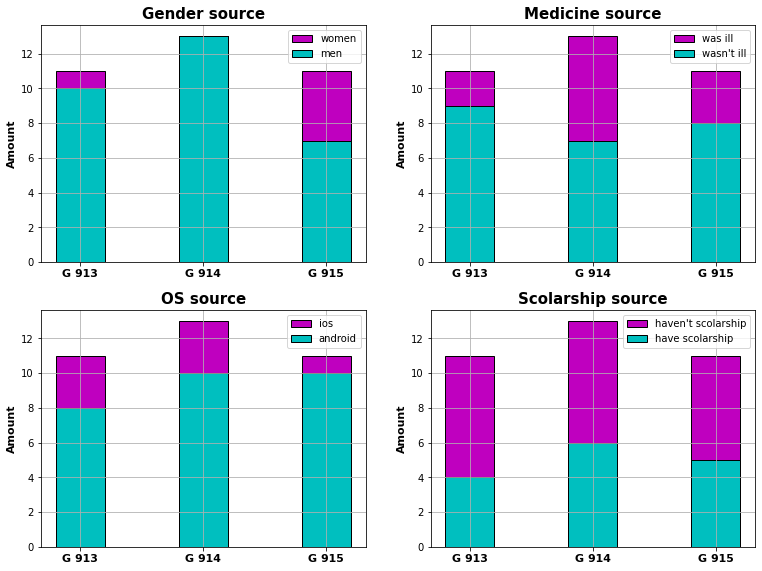

In [79]:
labels = ['G 913', 'G 914', 'G 915']

amount_of_people = [11, 13, 11] 
group_amounts = [[10, 13, 7],
                 [9, 7, 8],   
                 [8, 10, 10], 
                 [4, 6, 5]]   

titles = ['Gender source', 'Medicine source', 'OS source', 'Scolarship source']
l_labels = ['men', "wasn't ill", 'android', 'have scolarship']
g_labels = ['women', 'was ill', 'ios', "haven't scolarship"]
                 
my_bars = MultiBars()

for i in range(len(titles)):
    my_bars.add_bar(titles[i], labels, group_amounts[i], amount_of_people,
                   l_labels[i], g_labels[i])